In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
df = pd.read_csv("sec7.csv")
df

,date,strain,number,dots,cells,dots*cells
0,250924,159,1,1,3,3
1,250924,159,1,2,2,4
2,250924,159,1,3,3,9
3,250924,159,1,4,7,28
4,250924,159,1,5,5,25
...,...,...,...,...,...,...
205,250924,1372,3,11,0,0
206,250924,1372,3,12,2,24
207,250924,1372,3,13,0,0
208,250924,1372,3,14,0,0


In [3]:
# calculate dots per cell
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["dots_per_cell"] = df_number["dots*cells"] / df_number["cells"]
df_number

,strain,number,date,dots,cells,dots*cells,dots_per_cell
0,159,1,7527720,240,100,623,6.230000
1,159,2,7527720,240,103,762,7.398058
2,159,3,11291580,360,110,678,6.163636
3,1372,1,7527720,240,100,692,6.920000
4,1372,2,11291580,360,111,830,7.477477
5,1372,3,7527720,240,100,643,6.430000


In [4]:
# calculate mean and sem
dots_per_cell_mean = df_number.groupby("strain").mean()["dots_per_cell"]
dots_per_cell_sem = df_number.groupby("strain").std()["dots_per_cell"].values / np.sqrt(3)
print(dots_per_cell_mean)
print(dots_per_cell_sem)

strain
159     6.597232
1372    6.942492
Name: dots_per_cell, dtype: float64
[0.40087139 0.30258977]


## Welth's t-test

In [5]:
WT_dots = df_number[df_number["strain"] == 159]["dots_per_cell"]
atg18_dots = df_number[df_number["strain"] == 1372]["dots_per_cell"]
statistic, atg18_pvalue = stats.ttest_ind(WT_dots, atg18_dots, equal_var=False)
print(atg18_pvalue)

0.5322578906912456


## figure

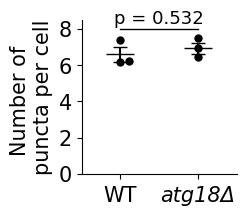

In [6]:
fig, ax = plt.subplots(figsize = (2, 2), dpi=100)

sns.swarmplot(x="strain", y="dots_per_cell", data=df_number, size=6,  color="black")
ax.errorbar(x=[0, 1], y=dots_per_cell_mean, yerr=dots_per_cell_sem, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fontsize = 15
y = -1.5
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg18Δ", ha="center", fontstyle="italic", fontsize=fontsize)

ax.plot([0, 1], [8, 8], color='k', lw=1)
ax.text(0.5, 8.3, f'p = {atg18_pvalue:.3f}', ha='center', fontsize=fontsize-2)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(0, 8.5)
ax.set_xticklabels("")
ax.set_xlabel("")
ax.set_yticks([0, 2, 4, 6, 8])
ax.set_yticklabels(["0", "2", "4", "6", "8"], fontsize=fontsize)
ax.set_ylabel("Number of \npuncta per cell", fontsize=fontsize, loc="center")
# save figure
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()